In [45]:
"""
Exp02C: Volatility Targeting Across Market Regimes

Goal:
- Evaluate whether volatility targeting provides consistent risk control benefits across different market regimes.
- Assess whether the improvements in downside risk and risk-adjusted
  performance are regime-dependent or structurally stable.

Fixed:
- MA_WINDOW = 80
- Risk modes:
  - RISK_MODE = "none"
  - RISK_MODE = "vol_target"

Sweep:
- Market regimes (time-based sub-samples):
  - 2015–2017
  - 2018–2019
  - 2020–2021
  - 2022
  - 2023–2025
  - Full sample

Evaluation:
- Max Drawdown (downside risk control)
- Sharpe Ratio (risk-adjusted performance)
- Annual Return (secondary, not optimized)

"""

'\nExp02C: Volatility Targeting Across Market Regimes\n\nGoal:\n- Evaluate whether volatility targeting provides consistent risk control benefits across different market regimes.\n- Assess whether the improvements in downside risk and risk-adjusted\n  performance are regime-dependent or structurally stable.\n\nFixed:\n- MA_WINDOW = 80\n- Risk modes:\n  - RISK_MODE = "none"\n  - RISK_MODE = "vol_target"\n\nSweep:\n- Market regimes (time-based sub-samples):\n  - 2015–2017\n  - 2018–2019\n  - 2020–2021\n  - 2022\n  - 2023–2025\n  - Full sample\n\nEvaluation:\n- Max Drawdown (downside risk control)\n- Sharpe Ratio (risk-adjusted performance)\n- Annual Return (secondary, not optimized)\n\n'

In [46]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from runner import run

In [48]:
subsamples = {
    "2015-2017": ("2015-01-02", "2017-12-29"),   # post-GFC recovery / sideways
    "2018-2019": ("2018-01-02", "2019-12-31"),   # vol spikes + pre-covid
    "2020-2021": ("2020-01-02", "2021-12-31"),   # covid crash + QE bull
    "2022":      ("2022-01-03", "2022-12-30"),   # rate-hike bear
    "2023-2025": ("2023-01-03", "2025-01-03"),   # recent regime
    "full":      ("2015-01-02", "2025-01-03"),
}

In [49]:
### baseline:  config
from dataclasses import replace
cfg_base = Config()
cfg_base = replace(cfg, MA_WINDOW=80)   # 和Exp02同

In [50]:

rows = []

for name, (start, end) in subsamples.items():
    cfg_tmp = replace(cfg_base, START = start, END = end) 

    for i in range(2):
        if i==0:
            risk_mode = 'none'
            cfg_tmp = replace(cfg_tmp, RISK_MODE=risk_mode)
        else:
            risk_mode = 'vol_target'
            cfg_tmp = replace(cfg_tmp, RISK_MODE=risk_mode)
            
        _, s = run(cfg_tmp)
    
        s["subsample"] = name
        s["START"] = start
        s["END"] = end
        s["RISK_MODE"] = risk_mode
    
        rows.append(s)

exp02c = pd.DataFrame(rows)
exp02c


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,subsample,START,END,RISK_MODE
0,0.066957,-0.118435,0.806350,26.000000,675,2015-2017,2015-01-02,2017-12-29,none
1,0.061826,-0.117625,0.762744,26.156534,675,2015-2017,2015-01-02,2017-12-29,vol_target
2,0.040937,-0.149217,0.497173,21.000000,423,2018-2019,2018-01-02,2019-12-31,none
3,0.045745,-0.136242,0.566544,19.364682,423,2018-2019,2018-01-02,2019-12-31,vol_target
4,0.255804,-0.102789,1.618033,13.000000,425,2020-2021,2020-01-02,2021-12-31,none
5,0.205433,-0.097166,1.541087,14.442292,425,2020-2021,2020-01-02,2021-12-31,vol_target
6,-0.130156,-0.139461,-1.122844,11.000000,171,2022,2022-01-03,2022-12-30,none
7,-0.106772,-0.113430,-1.235127,9.259990,171,2022,2022-01-03,2022-12-30,vol_target
8,0.196677,-0.085406,1.666605,10.000000,422,2023-2025,2023-01-03,2025-01-03,none
9,0.189055,-0.082182,1.640526,10.216746,422,2023-2025,2023-01-03,2025-01-03,vol_target


In [51]:
pivot_sharpe = exp02c.pivot(index="subsample", columns="RISK_MODE", values="Sharpe")
pivot_mdd    = exp02c.pivot(index="subsample", columns="RISK_MODE", values="Max Drawdown")
pivot_ret    = exp02c.pivot(index="subsample", columns="RISK_MODE", values="Annual Return")
pivot_to     = exp02c.pivot(index="subsample", columns="RISK_MODE", values="Total Turnover")

Text(0, 0.5, 'Sharpe Ratio')

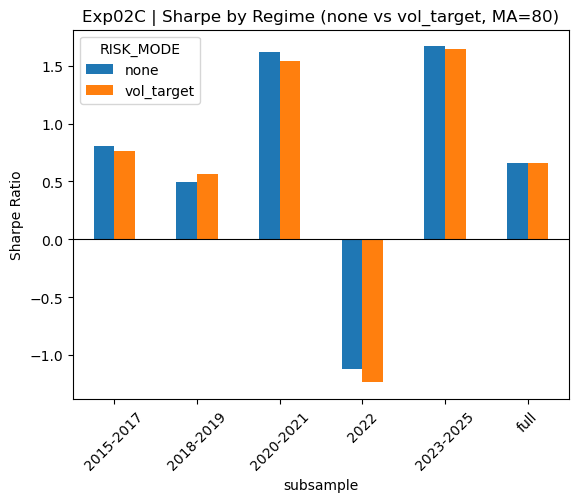

In [52]:
### Sharpe: none vs vol_target

ax = pivot_sharpe.plot(kind="bar", title=f"Exp02C | Sharpe by Regime (none vs vol_target, MA={cfg_base.MA_WINDOW})", rot=45)
ax.axhline(0, color="black", linewidth=0.8)
ax.set_ylabel("Sharpe Ratio")

Text(0, 0.5, 'Max Drawdown')

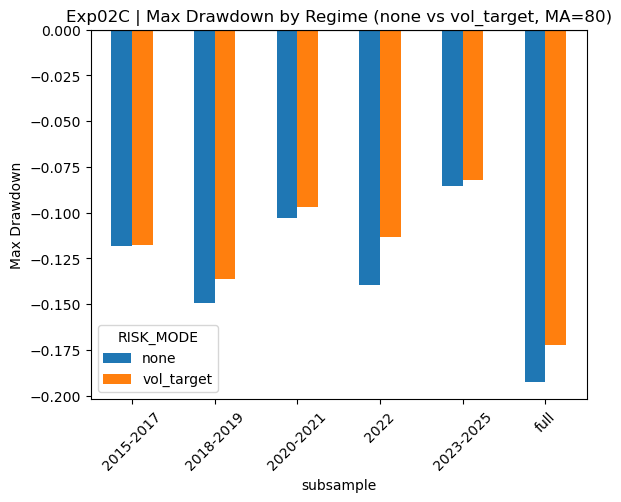

In [53]:
### Max Drawdown by Market Regime：none vs vol_target（vol targeting是否真的在控风险的证据）

ax = pivot_mdd.plot(kind="bar", title=f"Exp02C | Max Drawdown by Regime (none vs vol_target, MA={cfg_base.MA_WINDOW})", rot=45)
ax.axhline(0, color="black", linewidth=0.8)
ax.set_ylabel("Max Drawdown")


Text(0, 0.5, 'Annual Return')

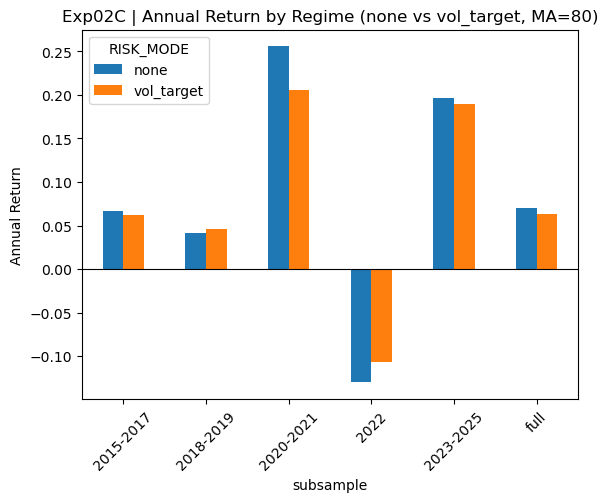

In [54]:
### Annual Return：none vs vol_target（收益对比）
ax = pivot_ret.plot(kind="bar", title=f"Exp02C | Annual Return by Regime (none vs vol_target, MA={cfg_base.MA_WINDOW})", rot=45)
ax.axhline(0, color="black", linewidth=0.8)
ax.set_ylabel("Annual Return")


Text(0, 0.5, 'Total Turnover')

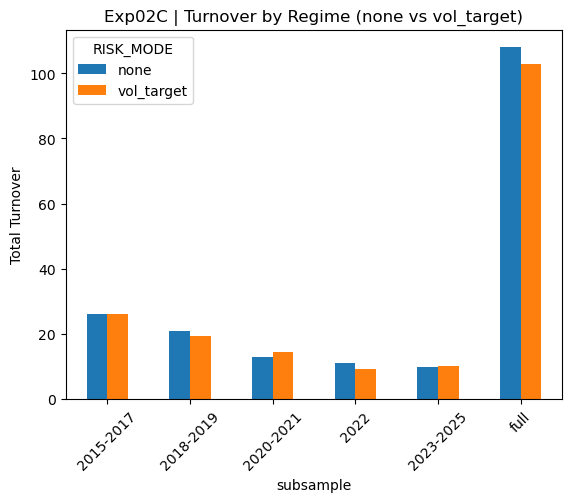

In [55]:
### Turnover：none vs vol_target（成本/交易频率线索）
ax = pivot_to.plot(kind="bar", title="Exp02C | Turnover by Regime (none vs vol_target)", rot=45)
ax.set_ylabel("Total Turnover")
